In [12]:
# macro do ipython para rederizar o matplotlib inline
%matplotlib inline

# numpy é uma biblioteca de python que 
# nos permite fazer operações matriciais e vetoriais
# facilmente, e eficientemente (até um certo tamanho)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

X, y = iris.data[:, -2:], iris.target

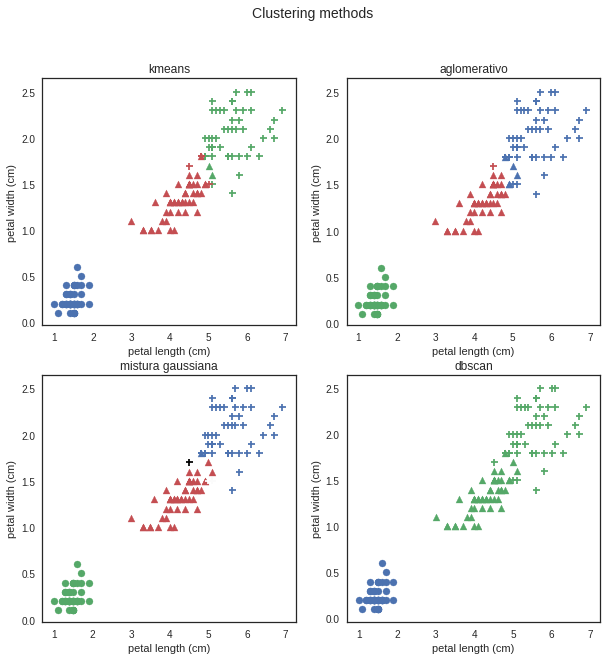

In [78]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

markers = np.array(['o', '^', '+'])
current_palette = sns.color_palette()

sns.set_style("white")

kmeans = KMeans(n_clusters = 3, random_state=0)

def plot_clusters(methods, X, y, markers, colors, feature_names):
    
    fig = plt.figure(figsize=(10, 10))
    plt.suptitle("Clustering methods", fontsize=14)
    
    for i, method in enumerate(methods):
        name, method = method
        ax = fig.add_subplot(221 + i)
        try:
            labels = method.fit_predict(X, y)
        except:
            labels = method.fit(X, y).predict(X)
        
        classes = np.unique(y)
        ms = markers[y]
        for m in markers:
            for j, c in enumerate(classes):
                mask = np.logical_and(ms == m, labels == c)
                plt.title("%s" % (name))
                plt.scatter(X[mask, 0], X[mask, 1], marker = m, c = colors[j])
                plt.legend(loc="best")
                
        ax.set_xlabel(feature_names[-2])
        ax.set_ylabel(feature_names[-1])    
    plt.show()
    
    
methods = [('kmeans', kmeans), 
           ('aglomerativo', AgglomerativeClustering(n_clusters = 3)),
           ('mistura gaussiana', GaussianMixture(n_components = 3)),
           ('dbscan', DBSCAN())
          ]
plot_clusters(methods, X, y, markers, current_palette, iris.feature_names)